# <font color=blue><strong>Formação de Ciência de Dados</strong></font>
## <font color=red><strong>Introdução ao Keras e guia para iniciantes: Classificando roupas com redes neurais</strong></font>
### <Strong>Colaboração: Adriano Santos</strong>

**Seja bem-vindo ao mundo da inteligência artificial!** Este guia te mostrará como construir e treinar um modelo de rede neural para classificar imagens de roupas usando o `TensorFlow`. 

**Mesmo que você seja novo na área,** não se preocupe! Vamos explicar tudo passo a passo, desde os conceitos básicos até a implementação do modelo. No final, você terá uma compreensão sólida de como as redes neurais funcionam e como elas podem ser usadas para resolver problemas reais.

**O que você vai aprender:**

* O que é uma rede neural e como ela funciona
* Como pré-processar imagens para treinamento
* Como construir um modelo de classificação de imagens usando o `TensorFlow`
* Como treinar e avaliar o modelo
* Como usar o modelo para classificar novas imagens

**O que você vai precisar:**

* Um computador com Python instalado
* O `TensorFlow` instalado (pode ser feito gratuitamente)
* Um conjunto de dados de imagens de roupas (pode ser encontrado online)

**O que é o Fashion MNIST**

O Fashion MNIST é um conjunto de dados que contém imagens de roupas, como camisetas, calças e tênis. Ele é similar ao MNIST clássico, que contém imagens de dígitos manuscritos. Ambos os conjuntos de dados são relativamente pequenos e são usados ​​para verificar se um algoritmo funciona conforme o esperado.

**Por que usar o Fashion MNIST**

Existem algumas razões para usar o Fashion MNIST:

* É fácil de usar. O conjunto de dados é bem organizado e fácil de carregar em seu programa.
* É um bom desafio para iniciantes. O Fashion MNIST é um pouco mais desafiador do que o MNIST clássico, mas ainda é possível obter bons resultados com algoritmos simples.
* É um bom ponto de partida para testar e depurar código. O tamanho pequeno do conjunto de dados torna mais fácil encontrar e corrigir erros.

**Pronto para começar?**

**Passo 1: Entendendo as redes neurais**

As redes neurais são sistemas computacionais inspirados no funcionamento do cérebro humano. Elas são compostas por neurônios artificiais que se conectam entre si para formar uma rede complexa. 

**Passo 2: Pré-processamento de imagens**

Antes de treinar a rede neural, é necessário preparar as imagens. Isso inclui redimensioná-las, normalizá-las e convertê-las em um formato que o `TensorFlow` possa entender.

**Passo 3: Construindo o modelo**

Usando o `TensorFlow`, você vai construir um modelo de rede neural com várias camadas. Cada camada aprende a identificar características específicas das imagens.

**Passo 4: Treinamento e avaliação**

O modelo é treinado usando um conjunto de imagens já rotuladas. O `TensorFlow` ajustará os parâmetros da rede neural para que ela aprenda a classificar as imagens corretamente. 

**Passo 5: Usando o modelo**

Depois de treinado, o modelo pode ser usado para classificar novas imagens. Basta fornecer a imagem ao modelo e ele te dirá qual a classe a qual ela pertence.

**Recursos adicionais:**

* Modelos e conjuntos de dados: https://www.tensorflow.org/resources/models-datasets?hl=pt-br 
* Ferramentas: https://www.tensorflow.org/resources/tools?hl=pt-br 
* Bibliotecas e extensões: https://www.tensorflow.org/resources/libraries-extensions?hl=pt-br 
* Domine seu programa: https://www.tensorflow.org/resources/learn-ml?hl=pt-br 
* Para iniciantes: https://www.tensorflow.org/tutorials?hl=pt-br

**Dicas para iniciantes:**

* Comece com um conjunto de dados simples e um modelo pequeno.
* Experimente diferentes arquiteturas de rede neural e parâmetros de treinamento.
* Use ferramentas de visualização para entender como a rede neural está aprendendo.
* Seja paciente! Treinar redes neurais pode levar tempo.

**Com este guia, você está pronto para dar os seus primeiros passos no mundo da classificação de imagens com redes neurais!**

**Boa sorte!**

<hr>

### <font color=orange><strong>Importando as bibliotecas necessárias</strong></font>

No código a seguir, está sendo utilizado o recurso __future__ para garantir que o código seja compatível com versões futuras do Python. Nenhuma biblioteca específica é importada neste trecho. Essas linhas garantem que o código seja executado da mesma forma em diferentes versões do Python, mesmo que novas funcionalidades sejam introduzidas posteriormente. O uso de __future__ permite que o código seja escrito de maneira mais robusta e preparada para atualizações futuras da linguagem. Em seguida, está sendo utilizado o `TensorFlow` para construir e treinar uma rede neural convolucional (CNN) para classificação de imagens. Primeiramente, são importadas as bibliotecas necessárias, incluindo o **tensorflow** e suas submódulos, como **keras**. Em seguida, é definida a arquitetura da rede neural, utilizando o **Sequential** para criar um modelo sequencial de camadas. As camadas convolucionais e de pooling são adicionadas com as classes **Conv2D** e **MaxPooling2D**, respectivamente, seguidas por camadas densas (**Dense**) para classificação. A função de ativação utilizada é especificada em cada camada. Após a definição da arquitetura, o modelo é compilado com um otimizador **RMSprop** e é exibida a versão do TensorFlow utilizada. O código está preparado para treinar e testar a CNN em um conjunto de dados de imagens, com o objetivo de aprender padrões e realizar classificações precisas.

In [1]:
from __future__ import absolute_import, division, print_function

import tensorflow as tf
from tensorflow import keras
from keras import backend as K
from keras.models import Sequential
from keras.optimizers import RMSprop
from keras.layers import (Dense, Dropout, Conv2D, MaxPooling2D, Flatten)

import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.12.0


### <font color=orange><strong>Importando o conjunto de dados de moda `fashion_mnist`</strong></font>

No código a seguir, está sendo utilizado o conjunto de dados Fashion MNIST, que é carregado da biblioteca **keras.datasets.fashion_mnist**. As imagens e seus rótulos de `treinamento` e `teste` são atribuídos às variáveis **train_images**, **train_labels**, **test_images** e **test_labels** através da função **load_data()**. Esse conjunto de dados é comumente utilizado em tarefas de aprendizado de máquina para classificação de imagens, sendo composto por `60.000 imagens de treinamento` e `10.000 imagens de teste`, cada uma em escala de cinza e com dimensões de 28x28 pixels, representando peças de roupa. Esse código é uma maneira simples e eficaz de carregar e acessar esse conjunto de dados para uso em modelos de aprendizado de máquina.

In [2]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

### <font color=orange><strong>Visualizando algumas informações sobre o dataset `fashion_mnist`</strong></font>

No código a seguir, está sendo impresso algumas informações sobre o dataset `MNIST`. Utilizando a biblioteca **numpy**, as dimensões das imagens de treino e teste, bem como as etiquetas correspondentes, são exibidas. As informações incluem o formato das imagens de treino (**train_images.shape**), o formato das imagens de teste (**test_images.shape**), o formato das etiquetas de treino (**train_labels.shape**) e o formato das etiquetas de teste (**test_labels.shape**).

In [3]:
print("Imagens de treino:", train_images.shape)
print("Imagens de teste:", test_images.shape)
print("Etiquetas de treino:", train_labels.shape)
print("Etiquetas de teste:", test_labels.shape)

Imagens de treino: (60000, 28, 28)
Imagens de teste: (10000, 28, 28)
Etiquetas de treino: (60000,)
Etiquetas de teste: (10000,)


### <font color=orange><strong>Definindo uma lista com os nomes das classes de itens de vestuários</strong></font>

No código a seguir, está sendo definida uma lista chamada **class_names** que contém os nomes das classes de itens de vestuário. Cada item na lista corresponde a uma categoria de roupa, como 'Camiseta/topo', 'Calça', 'Pulôver', 'Vestido', 'Casaco', 'Sandalia', 'Camisa', 'Tênis', 'Bolsa' e 'Bota de tornozelo'. Essa lista é útil para associar índices numéricos a categorias de roupas em problemas de classificação de imagens, onde cada categoria é representada por um número inteiro. Ao utilizar essa lista, é possível mapear o número inteiro previsto pelo modelo de aprendizado de máquina de volta para a categoria de roupa correspondente, facilitando a interpretação dos resultados.

In [4]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# class_names = ['Camiseta', 'Calça', 'Suéter', 'Vestido', 'Casaco', 'Sandália', 'Camisa', 'Tênis', 'Bolsa', 'Bota cano longo']

### <font color=orange><strong>Pré-processando e manipulando as imagens com `TensorFlow`</strong></font>

No código a seguir, está sendo utilizado o **matplotlib.pyplot** para criar uma figura e exibir uma imagem de treinamento. A função **imshow** é usada para exibir a imagem contida na variável **`train_images`[0]**. Em seguida, as funções **colorbar** e **grid** são chamadas para adicionar uma barra de cores e uma grade à imagem, respectivamente. Por fim, a função **show** é utilizada para mostrar a imagem na tela.

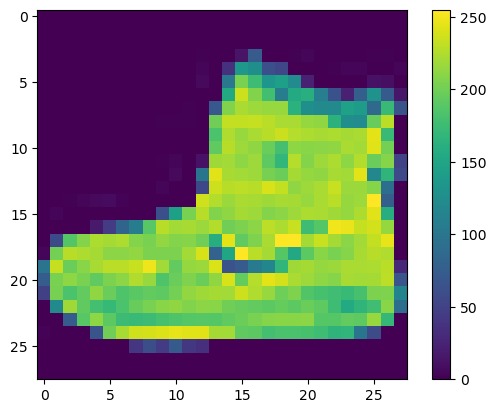

In [5]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

No código a seguir, está sendo verificado o formato dos dados de imagem utilizando a função **K.image_data_format()** da biblioteca TensorFlow. Se o formato for '`channels_first`', as imagens de treinamento e teste são remodeladas para terem uma dimensão de canal no início, seguindo o padrão (amostras, canais, linhas, colunas). Caso contrário, se o formato for diferente, as imagens são remodeladas para terem a dimensão de canal no final. Em seguida, todas as imagens são convertidas para o tipo de dados '`float32`' e normalizadas dividindo cada pixel pelo valor máximo de intensidade de pixel (255), para que estejam na faixa de 0 a 1. Essa etapa é essencial para o pré-processamento de dados antes do treinamento de modelos de redes neurais convolucionais, garantindo que os dados estejam em uma escala adequada para o processo de aprendizado.

In [6]:
if K.image_data_format() == 'channels_first':
    train_images = train_images.reshape(train_images.shape[0], 1, 28, 28)
    test_images = test_images.reshape(test_images.shape[0], 1, 28, 28)
    input_shape = (1, 28, 28)
else:
    train_images = train_images.reshape(train_images.shape[0], 28, 28, 1)
    test_images =test_images.reshape(test_images.shape[0], 28, 28, 1)
    input_shape = (28, 28, 1)
    
train_images = train_images.astype('float32')
test_images = test_images.astype('float32')
train_images /= 255
test_images /= 255

No código a seguir, está sendo utilizado a biblioteca **matplotlib.pyplot** para gerar um conjunto de 25 subplots organizados em uma grade 5x5, com cada subplot representando uma imagem de treinamento. O comando **plt.figure(figsize=(12, 12))** define o tamanho da figura. O loop **for** itera sobre os primeiros 25 elementos do conjunto de imagens de treinamento. Dentro do loop, cada subplot é configurado para não exibir os eixos (**plt.xticks([])** e **plt.yticks([])**), removendo as marcações e a grade, e então a imagem é plotada utilizando **plt.imshow()**, com o mapeamento de cores em preto e branco (**plt.cm.binary**). O rótulo de cada imagem é definido pelo índice correspondente no array **`train_labels`**, mapeado para o nome da classe através do array **`class_names`** e exibido na parte inferior de cada subplot com **plt.xlabel()**. Por fim, **plt.show()** é chamado para exibir a grade de subplots.

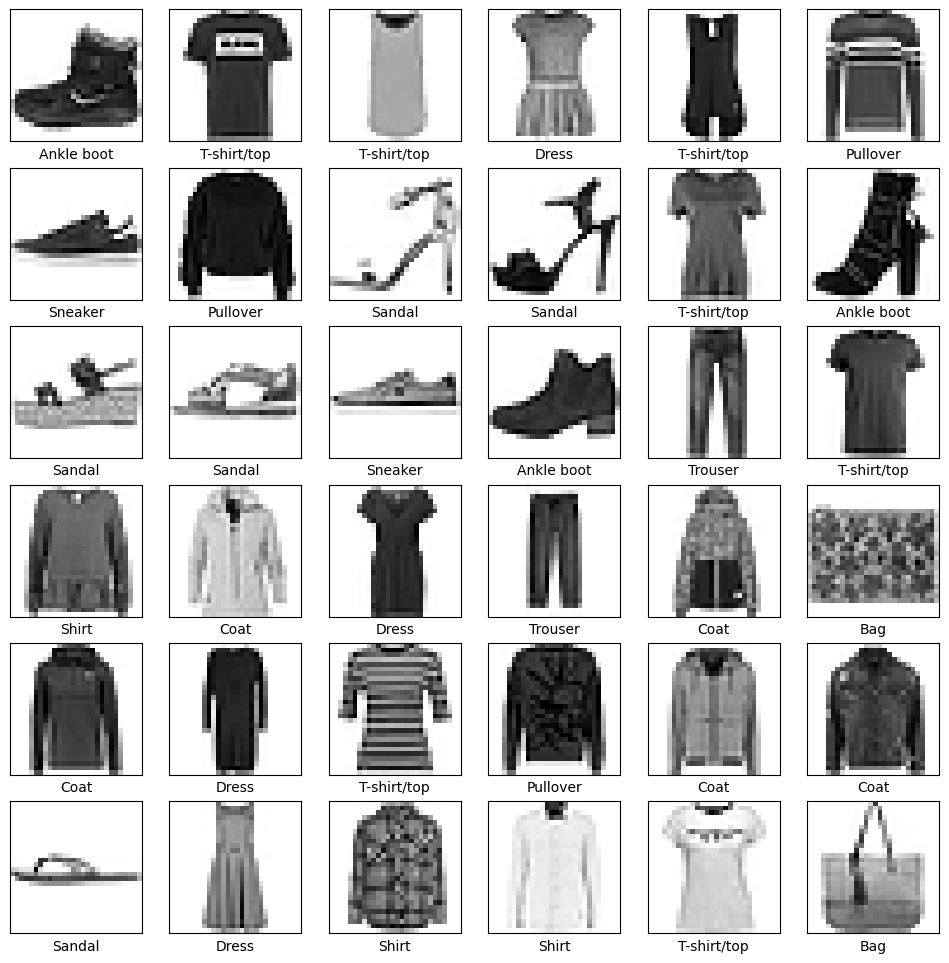

In [7]:
plt.figure(figsize = (12, 12))

for i in range(36):
    plt.subplot(6, 6, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
    
plt.show()

### <font color=orange><strong>Construindo os modelos e adicionando as camadas utilizando a biblioteca `Keras`</strong></font>

No código a seguir, está sendo definida uma arquitetura de rede neural convolucional (CNN) para classificação de imagens usando a biblioteca **Keras** com a variável **Sequential**. A primeira parte do modelo consiste em duas camadas de convolução, cada uma seguida por uma função de ativação ReLU, e uma camada de max pooling para redução de dimensionalidade. Após isso, temos uma camada de achatamento (**Flatten**) para transformar os dados em um vetor unidimensional, seguida por duas camadas densas (**Dense**) com ativação ReLU e softmax, respectivamente, para a classificação das imagens em 10 classes diferentes. 

Além disso, há duas variações do modelo principal: um com dropout após a primeira camada de max pooling para evitar overfitting (**Dropout**), e outro com dropout e especificação de tamanho de lote (**batch_size**), que controla o número de amostras a serem propagadas pela rede antes de atualizar os pesos. Essas variações visam melhorar o desempenho do modelo, reduzindo o overfitting e aumentando a generalização para novos dados de entrada. Ao final, cada modelo é compilado e está pronto para ser treinado com dados de imagens, utilizando algoritmos de otimização e métricas definidas anteriormente.

In [8]:
model_fashion_mnist = Sequential()

model_fashion_mnist.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
model_fashion_mnist.add(Conv2D(64, (3, 3), activation='relu'))
model_fashion_mnist.add(MaxPooling2D(pool_size=(2, 2)))
model_fashion_mnist.add(Flatten())
model_fashion_mnist.add(Dense(128, activation='relu'))
model_fashion_mnist.add(Dense(10, activation='softmax'))

In [9]:
model_fashion_mnist_dropout = Sequential()

model_fashion_mnist_dropout.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
model_fashion_mnist_dropout.add(Conv2D(64, (3, 3), activation='relu'))
model_fashion_mnist_dropout.add(MaxPooling2D(pool_size=(2, 2)))
model_fashion_mnist_dropout.add(Dropout(0.25))  # Linha de código acrescentada para evitar overfitting.
model_fashion_mnist_dropout.add(Flatten())
model_fashion_mnist_dropout.add(Dense(128, activation='relu'))
model_fashion_mnist_dropout.add(Dropout(0.5))  # Linha de código acrescentada para evitar overfitting.
model_fashion_mnist_dropout.add(Dense(10, activation='softmax'))

In [10]:
model_fashion_mnist_dropout_batch_size = Sequential()

model_fashion_mnist_dropout_batch_size.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
model_fashion_mnist_dropout_batch_size.add(Conv2D(64, (3, 3), activation='relu'))
model_fashion_mnist_dropout_batch_size.add(MaxPooling2D(pool_size=(2, 2)))
model_fashion_mnist_dropout_batch_size.add(Dropout(0.25))  # Linha de código acrescentada para evitar overfitting.
model_fashion_mnist_dropout_batch_size.add(Flatten())
model_fashion_mnist_dropout_batch_size.add(Dense(128, activation='relu'))
model_fashion_mnist_dropout_batch_size.add(Dropout(0.5))  # Linha de código acrescentada para evitar overfitting.
model_fashion_mnist_dropout_batch_size.add(Dense(10, activation='softmax'))

### <font color=orange><strong>Verificando a descrição dos modelos com a função `summary`</strong></font>

No código a seguir, está sendo utilizado o método **summary()** para exibir um resumo dos modelos de rede neural treinados para classificação de imagens da base de dados Fashion MNIST. Os modelos **model_fashion_mnist** e **model_fashion_mnist_dropout** estão sendo sumarizados para apresentar suas arquiteturas, destacando as camadas e parâmetros. Além disso, o modelo **model_fashion_mnist_dropout_batch_size** também é sumarizado para visualização das informações sobre a rede neural treinada com a técnica de dropout e especificação do tamanho do lote de dados utilizados durante o treinamento.

In [11]:
model_fashion_mnist.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 64)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 9216)              0         
                                                                 
 dense (Dense)               (None, 128)               1179776   
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                        

In [12]:
model_fashion_mnist_dropout.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 conv2d_3 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 12, 12, 64)       0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 12, 12, 64)        0         
                                                                 
 flatten_1 (Flatten)         (None, 9216)              0         
                                                                 
 dense_2 (Dense)             (None, 128)               1179776   
                                                      

In [13]:
model_fashion_mnist_dropout_batch_size.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 conv2d_5 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 12, 12, 64)       0         
 2D)                                                             
                                                                 
 dropout_2 (Dropout)         (None, 12, 12, 64)        0         
                                                                 
 flatten_2 (Flatten)         (None, 9216)              0         
                                                                 
 dense_4 (Dense)             (None, 128)               1179776   
                                                      

#### ***<font color=red>Observação Analítica:</font>***

* `Conv2D`: Uma camada convolucional 2D com 32 filtros de tamanho 3x3 é aplicada à imagem de entrada.
* `Conv2D_1`: Uma segunda camada convolucional 2D com 64 filtros de tamanho 3x3 é aplicada à saída da camada anterior.
* `MaxPooling2D`: Max pooling é realizado com um tamanho de janela de 2x2, reduzindo o tamanho da saída.
* `Flatten`: A saída 2D é transformada em um vetor 1D para alimentar as camadas densas.
* `Dense`: Uma camada totalmente conectada com 128 neurônios recebe o vetor 1D.
* `Dense_1`: A camada final de saída possui 10 neurônios para prever 10 classes diferentes.
* `Total de Parâmetros`: 1.199.882 - Este é o número total de parâmetros na rede que precisam ser aprendidos durante o treinamento.
* `Parâmetros Treináveis`: 1.199.882 - Todos os parâmetros são treináveis neste caso.
* `Parâmetros Não Treináveis`: 0 - Não há pesos pré-treinados ou parâmetros não treináveis.

### <font color=orange><strong>Definindo as Redes Neurais Convolucionais utilizando a biblioteca `Keras`</strong></font>

No código a seguir, está sendo compilado um modelo de rede neural para classificação de imagens usando a biblioteca **Keras**. O compilador é configurado com o otimizador **Adam**, uma função de perda de **entropia cruzada categórica esparsa** e a métrica de **acurácia** para avaliar o desempenho do modelo durante o treinamento. Essa configuração define como o modelo será treinado, especificando o algoritmo de otimização, a função de perda e as métricas a serem monitoradas. O otimizador Adam é uma variação eficaz do gradiente descendente estocástico, enquanto a entropia cruzada categórica esparsa é uma função de perda comumente usada em problemas de classificação multiclasse, como a tarefa de classificação de imagens do conjunto de dados Fashion MNIST. A métrica de acurácia fornece uma medida do quão precisamente o modelo está classificando as imagens durante o treinamento. Essa configuração é essencial para garantir que o modelo seja treinado de forma eficaz e produza resultados precisos.

Portanto, antes de o modelo estar pronto para o treinamento, ele requer algumas configurações adicionais. Essas configurações são aplicadas durante a etapa de compilação do modelo:

1. **Função de Perda**: Essa função mede a precisão do modelo durante o treinamento. Nosso objetivo é minimizar essa função para orientar o modelo na direção correta.

2. **Otimizador**: O otimizador é responsável por atualizar o modelo com base nos dados que ele observa e na função de perda.

3. **Métricas**: As métricas são usadas para monitorar as etapas de treinamento e teste. No exemplo a seguir, utilizamos a métrica de precisão, que representa a fração de imagens classificadas corretamente.

In [14]:
model_fashion_mnist.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [15]:
model_fashion_mnist_dropout.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [16]:
model_fashion_mnist_dropout_batch_size.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

### <font color=orange><strong>Criando função para visualizar desempenho do modelo ao longo do treino</strong></font>

No código a seguir, está sendo definida uma função chamada **plot_metrics** que recebe um objeto **history** como parâmetro. Dentro da função, é criado um gráfico com duas subtramas utilizando a função **subplots** da biblioteca **matplotlib.pyplot**. Uma subtrama mostra a métrica de acurácia ao longo das épocas, enquanto a outra mostra a métrica de erro. Se o histórico de validação estiver presente, as métricas de acurácia e erro também são plotadas para os dados de validação. Por fim, é adicionada uma anotação com o nome do analista e é exibido o gráfico. Esta função é útil para visualizar o desempenho de um modelo de aprendizado de máquina ao longo do treinamento, facilitando a análise e a tomada de decisões quanto ao ajuste do modelo.

In [17]:
def plot_metrics(history):
    fig, axes = plt.subplots(2, 1, sharex=True, figsize=(8, 12))

    axes[0].plot(history.history['accuracy'], marker='o')
    axes[0].set_title('Métrica de Acurácia', fontsize=18)

    axes[1].plot(history.history['loss'], marker='o')
    axes[1].set_title('Métrica de Erro', fontsize=18)

    if 'val_loss' in history.history.keys():
        axes[0].plot(history.history['val_accuracy'], marker='o')
        axes[1].plot(history.history['val_loss'], marker='o')
        axes[0].legend(['Treino', 'Validação'])
        axes[1].legend(['Treino', 'Validação'])

    plt.annotate('Análise efetuado por: @Adriano Santos', xy=(1, -0.30), xycoords='axes fraction', ha='right', fontsize=12)
    plt.xlabel('Épocas', fontsize=18)
    plt.show()

### <font color=orange><strong>Utilizando o método `fit` para treinar o modelo `model_fashion_mnist`</strong></font>

No código a seguir, está sendo realizado o treinamento de um modelo de rede neural utilizando a função **fit** da biblioteca **model_fashion_mnist**. Este modelo é treinado com um conjunto de imagens de treino (**train_images**) e seus respectivos rótulos (**train_labels**), utilizando um tamanho de `lote de 32 exemplos` por iteração e um total de 10 épocas de treinamento. O parâmetro **verbose=2** indica que serão exibidos detalhes do processo de treinamento durante a execução. Além disso, está sendo realizada a validação do modelo utilizando o conjunto de dados de teste (**test_images** e **test_labels**). O resultado do treinamento é armazenado na variável **history**, que pode ser utilizada posteriormente para análise do desempenho do modelo.

In [18]:
history = model_fashion_mnist.fit(
    train_images,
    train_labels,
    batch_size=32,
    epochs=10,
    verbose=2,
    validation_data=(test_images, test_labels),
)

Epoch 1/10


1875/1875 - 288s - loss: 0.3658 - accuracy: 0.8708 - val_loss: 0.2840 - val_accuracy: 0.8936 - 288s/epoch - 154ms/step
Epoch 2/10
1875/1875 - 273s - loss: 0.2255 - accuracy: 0.9178 - val_loss: 0.2508 - val_accuracy: 0.9111 - 273s/epoch - 146ms/step
Epoch 3/10
1875/1875 - 270s - loss: 0.1708 - accuracy: 0.9365 - val_loss: 0.2262 - val_accuracy: 0.9210 - 270s/epoch - 144ms/step
Epoch 4/10
1875/1875 - 281s - loss: 0.1273 - accuracy: 0.9527 - val_loss: 0.2407 - val_accuracy: 0.9210 - 281s/epoch - 150ms/step
Epoch 5/10
1875/1875 - 291s - loss: 0.0950 - accuracy: 0.9645 - val_loss: 0.2454 - val_accuracy: 0.9215 - 291s/epoch - 155ms/step
Epoch 6/10
1875/1875 - 261s - loss: 0.0691 - accuracy: 0.9743 - val_loss: 0.2766 - val_accuracy: 0.9244 - 261s/epoch - 139ms/step
Epoch 7/10
1875/1875 - 265s - loss: 0.0510 - accuracy: 0.9808 - val_loss: 0.3220 - val_accuracy: 0.9213 - 265s/epoch - 141ms/step
Epoch 8/10
1875/1875 - 277s - loss: 0.0401 - accuracy: 0.9855 - val_loss: 0.3577 - val_accuracy: 0.92

### <font color=orange><strong>Visualizando o desempenho do modelo `model_fashion_mnist` ao longo do tempo</strong></font>

No código a seguir, está sendo utilizado a função **plot_metrics**, a qual recebe o objeto **history** como parâmetro. Essa função é responsável por traçar gráficos que representam as métricas de desempenho de um modelo de aprendizado de máquina ao longo do tempo de treinamento. O objeto **history** contém informações sobre o `histórico do treinamento do modelo`, incluindo métricas como `precisão`, `perda` e `acurácia`.

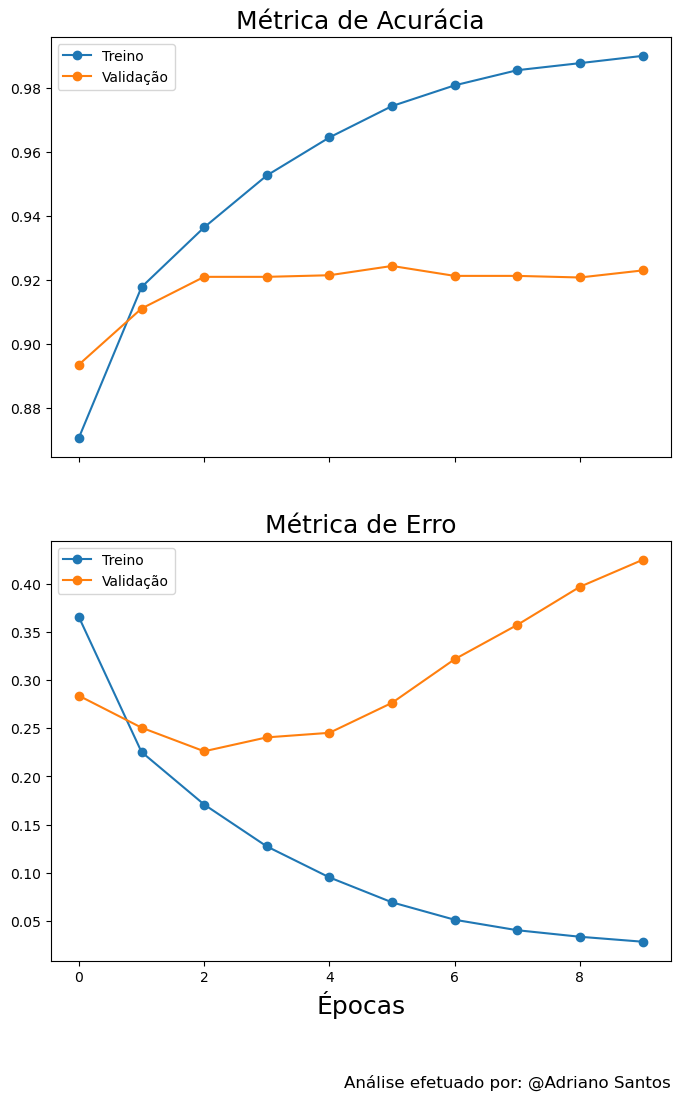

In [19]:
plot_metrics(history)

#### ***<font color=red>Análise do Gráfico do Histórico do Treinamento do Modelo</font>***

O gráfico apresentado é uma representação da **Métrica de Acurácia** e da **Métrica de Erro** ao longo de várias épocas para os conjuntos de treino e validação. Vamos analisar cada aspecto:

1. **Métrica de Acurácia**:
   - A linha azul representa a acurácia no conjunto de treino, enquanto a linha laranja representa a acurácia no conjunto de validação.
   - Ambas as linhas estão **aumentando** com o tempo, o que é um bom sinal. Isso indica que o modelo está aprendendo eficazmente e melhorando sua capacidade de fazer previsões corretas.
   - No entanto, é importante observar se há **sinais de overfitting**. Se a acurácia no conjunto de treino continuar a aumentar enquanto a acurácia no conjunto de validação estagnar ou diminuir, isso pode indicar que o modelo está se ajustando demais aos dados de treinamento e não generalizando bem para dados não vistos.

2. **Métrica de Erro**:
   - A linha azul representa o erro no conjunto de treino, enquanto a linha laranja representa o erro no conjunto de validação.
   - Ambas as linhas estão **diminuindo** com o tempo, o que é positivo. Isso significa que o modelo está reduzindo seus erros à medida que aprende com os dados.
   - No entanto, assim como com a acurácia, é importante verificar se há **indícios de overfitting**. Um erro muito baixo no conjunto de treino pode ser um sinal de que o modelo está memorizando os dados de treinamento em vez de aprender padrões gerais.

Em resumo, o gráfico mostra um modelo que está aprendendo bem, mas é essencial monitorar o equilíbrio entre `acurácia` e `erro`, garantindo que o modelo generalize bem para novos dados.

### <font color=orange><strong>Utilizando o método `fit` para treinar o modelo `model_fashion_mnist_dropout`</strong></font>

No código a seguir, está sendo realizado o treinamento de um modelo de rede neural utilizando a função **fit** da biblioteca **model_fashion_mnist_dropout**. Este modelo é treinado com um conjunto de imagens de treino (**train_images**) e seus respectivos rótulos (**train_labels**), utilizando um tamanho de `lote de 32 exemplos` por iteração e um total de 10 épocas de treinamento. O parâmetro **verbose=2** indica que serão exibidos detalhes do processo de treinamento durante a execução. Além disso, está sendo realizada a validação do modelo utilizando o conjunto de dados de teste (**test_images** e **test_labels**). O resultado do treinamento é armazenado na variável **history_dropout**, que pode ser utilizada posteriormente para análise do desempenho do modelo.

In [20]:
history_dropout = model_fashion_mnist_dropout.fit(
    train_images,
    train_labels,
    batch_size=32,
    epochs=10,
    verbose=2,
    validation_data=(test_images, test_labels),
)

Epoch 1/10


1875/1875 - 274s - loss: 0.4700 - accuracy: 0.8331 - val_loss: 0.3178 - val_accuracy: 0.8844 - 274s/epoch - 146ms/step
Epoch 2/10
1875/1875 - 292s - loss: 0.3159 - accuracy: 0.8869 - val_loss: 0.2747 - val_accuracy: 0.8983 - 292s/epoch - 156ms/step
Epoch 3/10
1875/1875 - 273s - loss: 0.2689 - accuracy: 0.9011 - val_loss: 0.2649 - val_accuracy: 0.8995 - 273s/epoch - 145ms/step
Epoch 4/10
1875/1875 - 294s - loss: 0.2406 - accuracy: 0.9118 - val_loss: 0.2360 - val_accuracy: 0.9147 - 294s/epoch - 157ms/step
Epoch 5/10
1875/1875 - 269s - loss: 0.2175 - accuracy: 0.9204 - val_loss: 0.2227 - val_accuracy: 0.9185 - 269s/epoch - 143ms/step
Epoch 6/10
1875/1875 - 270s - loss: 0.1965 - accuracy: 0.9271 - val_loss: 0.2136 - val_accuracy: 0.9245 - 270s/epoch - 144ms/step
Epoch 7/10
1875/1875 - 275s - loss: 0.1830 - accuracy: 0.9323 - val_loss: 0.2365 - val_accuracy: 0.9196 - 275s/epoch - 147ms/step
Epoch 8/10
1875/1875 - 275s - loss: 0.1683 - accuracy: 0.9382 - val_loss: 0.2291 - val_accuracy: 0.92

### <font color=orange><strong>Visualizando o desempenho do modelo ao longo do tempo e com `dropout` adicionado</strong></font>

No código a seguir, está sendo utilizado a função **plot_metrics**, a qual recebe o objeto **history** como parâmetro. Essa função é responsável por traçar gráficos que representam as métricas de desempenho de um modelo de aprendizado de máquina ao longo do tempo de treinamento. O objeto **history_dropout** contém informações sobre o `histórico do treinamento do modelo`, incluindo métricas como `precisão`, `perda` e `acurácia`.

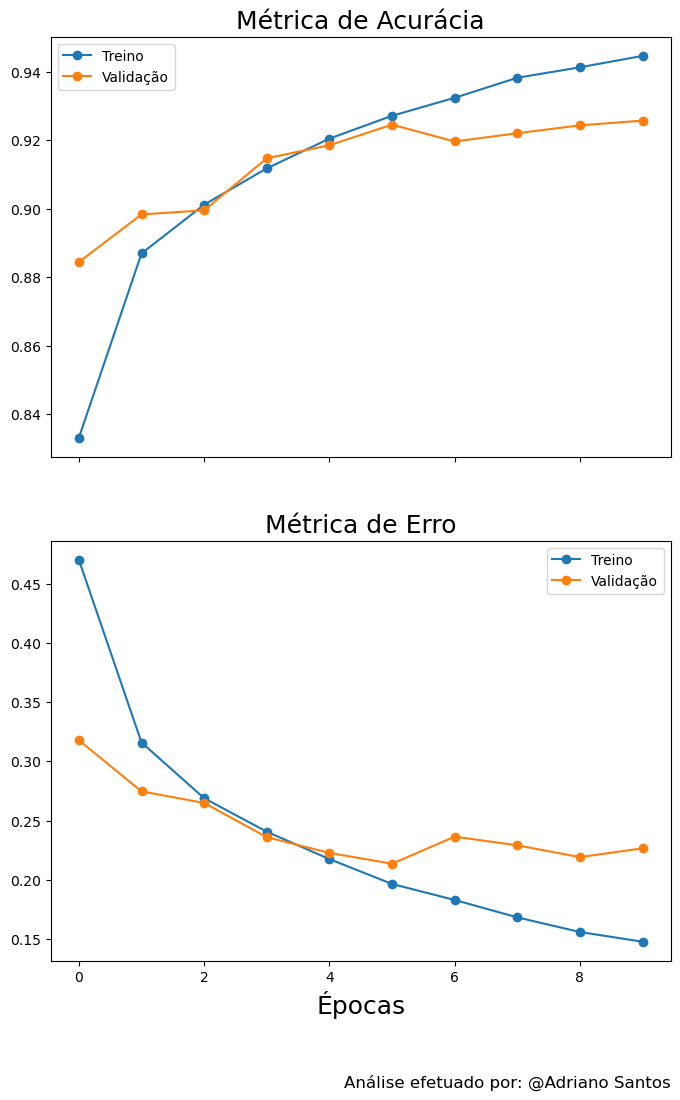

In [21]:
plot_metrics(history_dropout)

#### ***<font color=red>Análise do Gráfico do Histórico do Treinamento do Modelo</font>***

O gráfico mostra duas métricas: acurácia e erro, para os dados de treino e validação ao longo de várias épocas. A acurácia mede a proporção de previsões corretas do modelo, enquanto o erro mede a diferença entre as saídas esperadas e as saídas geradas pelo modelo.

Algumas conclusões que eu posso tirar são:

- O `gráfico de acurácia` mostra que o modelo atinge uma acurácia de cerca de 0.8 após aproximadamente seis épocas, tanto para o treino quanto para a validação. Isso sugere que o modelo aprendeu bem os padrões dos dados e não sofreu de sobreajuste nem subajuste. Sobreajuste ocorre quando o modelo se adapta demais aos dados de treino e perde a capacidade de generalizar para novos dados. Subajuste ocorre quando o modelo não consegue captar a complexidade dos dados e tem um desempenho ruim tanto no treino quanto na validação.
- O `gráfico de erro` mostra que o modelo reduz o erro de quase 2.0 para menos de 0.8, tanto para o treino quanto para a validação. Isso indica que o modelo minimizou a diferença entre as saídas esperadas e as saídas geradas. Um erro baixo significa que o modelo está mais próximo da realidade dos dados.

Ambos os gráficos parecem se estabilizar após cerca de seis épocas, o que significa que o modelo não teve uma melhoria significativa ao continuar o treinamento. Talvez seja possível reduzir o número de épocas ou usar uma taxa de aprendizado menor para evitar o desperdício de recursos computacionais.

### <font color=orange><strong>Utilizando o método `fit` para treinar o modelo com `batch_size` alterado</strong></font>

No código a seguir, está sendo realizado o treinamento de um modelo de rede neural utilizando a função **fit** da biblioteca **model_fashion_mnist_dropout_batch_size**. Este modelo é treinado com um conjunto de imagens de treino (**train_images**) e seus respectivos rótulos (**train_labels**), utilizando um tamanho de `lote de 1000 exemplos` por iteração e um total de 10 épocas de treinamento. O parâmetro **verbose=2** indica que serão exibidos detalhes do processo de treinamento durante a execução. Além disso, está sendo realizada a validação do modelo utilizando o conjunto de dados de teste (**test_images** e **test_labels**). O resultado do treinamento é armazenado na variável **history_dropout_batch_size**, que pode ser utilizada posteriormente para análise do desempenho do modelo.

In [22]:
history_dropout_batch_size = model_fashion_mnist_dropout_batch_size.fit(
    train_images,
    train_labels,
    batch_size=1000,  # Linha de código alterada para mudar a quantidade de lotes por interação.
    epochs=10,
    verbose=2,
    validation_data=(test_images, test_labels),
)

Epoch 1/10


60/60 - 201s - loss: 0.7854 - accuracy: 0.7242 - val_loss: 0.4513 - val_accuracy: 0.8393 - 201s/epoch - 3s/step
Epoch 2/10
60/60 - 203s - loss: 0.4521 - accuracy: 0.8419 - val_loss: 0.3696 - val_accuracy: 0.8641 - 203s/epoch - 3s/step
Epoch 3/10
60/60 - 195s - loss: 0.3776 - accuracy: 0.8677 - val_loss: 0.3271 - val_accuracy: 0.8813 - 195s/epoch - 3s/step
Epoch 4/10
60/60 - 184s - loss: 0.3356 - accuracy: 0.8821 - val_loss: 0.3024 - val_accuracy: 0.8880 - 184s/epoch - 3s/step
Epoch 5/10
60/60 - 187s - loss: 0.3104 - accuracy: 0.8894 - val_loss: 0.2838 - val_accuracy: 0.8982 - 187s/epoch - 3s/step
Epoch 6/10
60/60 - 195s - loss: 0.2884 - accuracy: 0.8981 - val_loss: 0.2686 - val_accuracy: 0.9029 - 195s/epoch - 3s/step
Epoch 7/10
60/60 - 188s - loss: 0.2706 - accuracy: 0.9033 - val_loss: 0.2612 - val_accuracy: 0.9064 - 188s/epoch - 3s/step
Epoch 8/10
60/60 - 186s - loss: 0.2578 - accuracy: 0.9075 - val_loss: 0.2494 - val_accuracy: 0.9088 - 186s/epoch - 3s/step
Epoch 9/10
60/60 - 182s - l

### <font color=orange><strong>Visualizando o desempenho do modelo ao longo do tempo e com `batch_size` alterado</strong></font>

No código a seguir, está sendo utilizado a função **plot_metrics**, a qual recebe o objeto **history** como parâmetro. Essa função é responsável por traçar gráficos que representam as métricas de desempenho de um modelo de aprendizado de máquina ao longo do tempo de treinamento. O objeto **history_dropout_batch_size** contém informações sobre o histórico do treinamento do modelo, incluindo métricas como `precisão`, `perda` e `acurácia`.

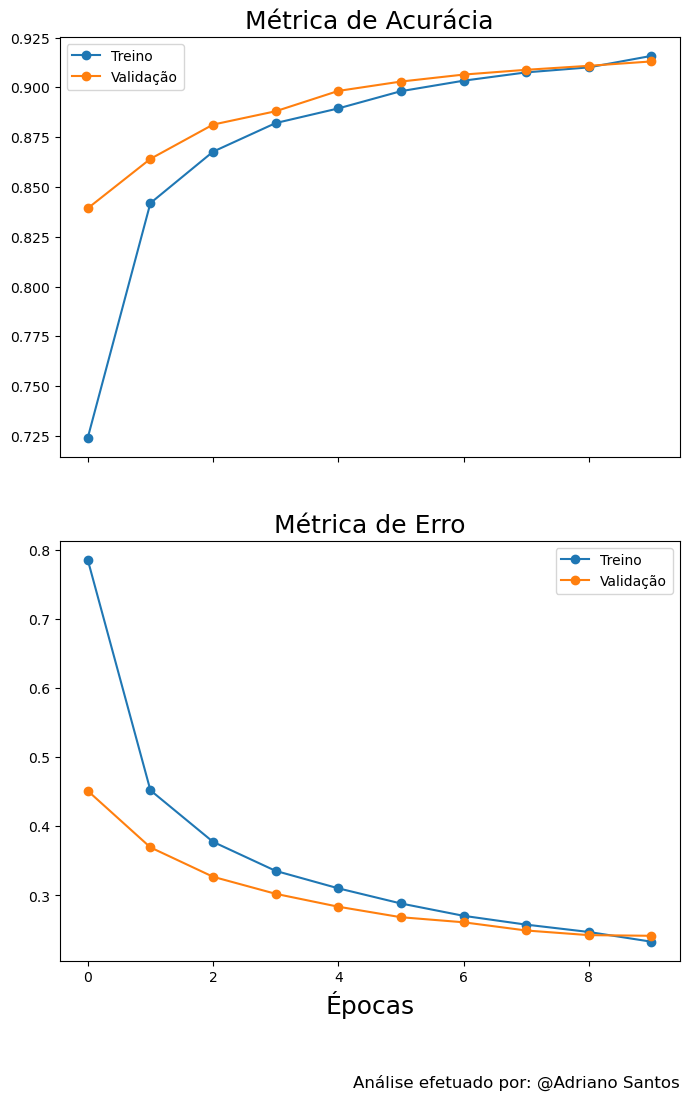

In [23]:
plot_metrics(history_dropout_batch_size)

#### ***<font color=red>Análise do Gráfico do Histórico do Treinamento do Modelo</font>***

O gráfico que você enviou mostra o histórico de treinamento do modelo em termos de métrica de `acurácia` e métrica de `erro` ao longo das épocas. A métrica de `acurácia` aumenta com o tempo, indicando uma melhoria no desempenho do modelo, enquanto a métrica de `erro` diminui, sugerindo que o modelo está cometendo menos erros à medida que é treinado.

Algumas observações que eu posso fazer são:

- O gráfico de `acurácia` mostra que o modelo atinge uma `acurácia` de cerca de 0.8 após aproximadamente seis épocas, tanto para o treino quanto para a validação. Isso sugere que o modelo aprendeu bem os padrões dos dados e não sofreu de sobreajuste nem subajuste.
- O gráfico de `erro` mostra que o modelo reduz o `erro` de quase 2.0 para menos de 0.8, tanto para o treino quanto para a validação. Isso indica que o modelo minimizou a diferença entre as saídas esperadas e as saídas geradas.
Ambos os gráficos parecem se estabilizar após cerca de seis épocas, o que significa que o modelo não teve uma melhoria significativa ao continuar o treinamento. Talvez seja possível reduzir o número de épocas ou usar uma taxa de aprendizado menor para evitar o desperdício de recursos computacionais.

### <font color=orange><strong>Avaliando o desempenho do modelo com o método `evaluate`</strong></font>

O código avalia o modelo na base de teste calculando a loss e acurácia de teste (`test_loss` e `test_acc`), então imprime a acurácia de teste formatada como porcentagem com 2 casas decimais, precedida por uma nova linha, para apresentar de forma limpa o resultado de desempenho (`acurácia`) do modelo após o treinamento na base de validação ser concluído e poder analisar como o modelo generaliza para dados nunca vistos antes (base de teste).

In [24]:
test_mnist_loss, test_mnist_acc = model_fashion_mnist.evaluate(test_images, test_labels)
print('\nTest accuracy: {:.2%}'.format(test_mnist_acc))

  1/313 [..............................] - ETA: 1:07 - loss: 1.3206 - accuracy: 0.9062

313/313 [==============================] - 12s 39ms/step - loss: 0.4253 - accuracy: 0.9230

Test accuracy: 92.30%


In [25]:
test_dropout_loss, test_dropout_acc = model_fashion_mnist_dropout.evaluate(test_images, test_labels)
print('\nTest accuracy: {:.2%}'.format(test_dropout_acc))

  1/313 [..............................] - ETA: 1:02 - loss: 0.5661 - accuracy: 0.9062

313/313 [==============================] - 13s 41ms/step - loss: 0.2266 - accuracy: 0.9257

Test accuracy: 92.57%


In [26]:
test_batch_loss, test_batch_acc = model_fashion_mnist_dropout_batch_size.evaluate(test_images, test_labels)
print('\nTest accuracy: {:.2%}'.format(test_batch_acc))

313/313 [==============================] - 11s 34ms/step - loss: 0.2417 - accuracy: 0.9130

Test accuracy: 91.30%


### <font color=orange><strong>Fazendo previsões com o método `predict` sobre algumas imagens</strong></font>

O código faz predições na base de teste usando o modelo treinado e imprime as predições da primeira amostra, precedidas por uma nova linha e texto "`Predictions`:", para analisar visualmente o array de predições (probabilidades para cada classe) retornado pelo modelo para uma entrada de teste e comparar com o valor real da label de teste correspondente, a fim de avaliar qualitativamente se o modelo está fazendo boas predições.

In [27]:
predictions = model_fashion_mnist.predict(test_images)
print('\nPredictions:\n', (predictions[0]))

313/313 [==============================] - 11s 32ms/step

Predictions:
 [1.8454018e-16 2.6667137e-14 7.8968683e-17 5.9413199e-18 1.3404231e-20
 1.8603660e-15 3.1240227e-16 2.2404358e-09 1.9417429e-22 1.0000000e+00]


In [28]:
predictions_dropout = model_fashion_mnist_dropout.predict(test_images)
print('\nPredictions:\n', (predictions_dropout[0]))

313/313 [==============================] - 12s 38ms/step

Predictions:
 [1.9151220e-13 7.2147396e-18 2.9568302e-15 2.9448310e-15 6.1368757e-15
 6.9638179e-10 6.9212051e-14 4.0522362e-08 1.7735628e-15 1.0000000e+00]


In [29]:
predictions_dropout_batch = model_fashion_mnist_dropout_batch_size.predict(test_images)
print('\nPredictions:\n', (predictions_dropout_batch[0]))

313/313 [==============================] - 11s 34ms/step

Predictions:
 [6.1262725e-08 5.3598228e-08 8.5858884e-09 2.6521954e-07 2.3443607e-07
 7.9045785e-05 4.5850850e-08 3.8465050e-03 1.1214444e-07 9.9607372e-01]


### <font color=orange><strong>Visualizando o índice do maior valor presente na variável com o método `argmax`</strong></font>

No código a seguir, está sendo utilizado o método **`argmax`** da biblioteca **np** para retornar o índice do maior valor presente na variável **predictions[0]**, que provavelmente contém os resultados de previsões de algum modelo, como em aprendizado de máquina. Essa função é comumente usada para determinar a classe com maior probabilidade em problemas de classificação.

In [30]:
np.argmax(predictions[0])

9

In [31]:
np.argmax(predictions_dropout[0])

9

In [32]:
np.argmax(predictions_dropout_batch[0])

9

Portanto, o modelo está mais confiante de que essa imagem representa uma **inicialização do tornozelo**, ou seja, corresponde à classe `class_names[9]`. Podemos verificar o rótulo de teste para confirmar se essa classificação está correta.

In [33]:
test_labels[0]

9

Ambas as funções utilizam a biblioteca plt para plotagem e a biblioteca np para operações matemáticas.
### <font color=orange><strong>Definindo as funções `plot_image` para plotagem e `plot_value_array` para operaões matemáticas</strong></font>

No código a seguir, está sendo definidas duas funções: **plot_image** e **plot_value_array**. A função `plot_image` recebe como parâmetros um índice (**i**), um array de previsões (**predictions_array**), um rótulo verdadeiro (**true_label**) e uma imagem (**img**). Ela plota a imagem, ajusta a grade do gráfico e adiciona um texto com o rótulo previsto e sua confiança em porcentagem, além do rótulo verdadeiro, utilizando cores diferentes para indicar acertos e erros. A função `plot_value_array` também recebe um índice, um array de previsões e um rótulo verdadeiro, e plota um gráfico de barras representando as previsões de cada classe, com as cores das barras indicando a previsão correta em azul e a previsão errada em vermelho. Ambas as funções utilizam a biblioteca **matplotlib** para visualização e a biblioteca **numpy** para manipulação de arrays.

In [34]:
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)
    predicted_label = np.argmax(predictions_array)
    color = 'blue' if predicted_label == true_label else 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(
        class_names[predicted_label],
        100 * np.max(predictions_array),
        class_names[true_label]
    ), color=color)

def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0,  1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

### <font color=orange><strong>Visualizando previsões em um conjunto de dados de imagens</strong></font>

No código a seguir, está sendo inicializado um contador **i** com valor zero. Em seguida, uma figura é criada com a função **plt.figure(figsize=(6,3))** do matplotlib com dimensões de 6 por 3 polegadas. Duas subparcelas são criadas com **plt.subplot(1,2,1)** e **plt.subplot(1,2,2)**, representando a disposição das próximas visualizações. Na primeira subparcela, é chamada a função **plot_image(i, predictions, test_labels, test_images)** para exibir uma imagem de teste indexada por **i** junto com suas previsões. Na segunda subparcela, a função **plot_value_array(i, predictions, test_labels)** é usada para plotar um array de valores representando as previsões de classe para a imagem **i**. Este código é útil para visualizar previsões em um conjunto de dados de imagens.

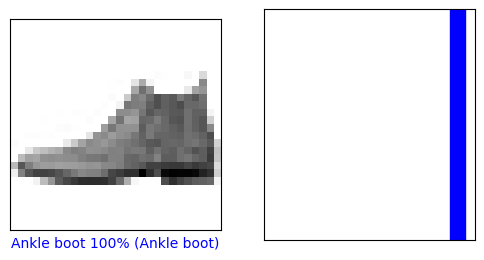

In [35]:
i =  0
plt.figure(figsize=(6,  3))

plt.subplot(1,  2,  1)
plot_image(i, predictions, test_labels, test_images)

plt.subplot(1,  2,  2)
plot_value_array(i, predictions, test_labels)

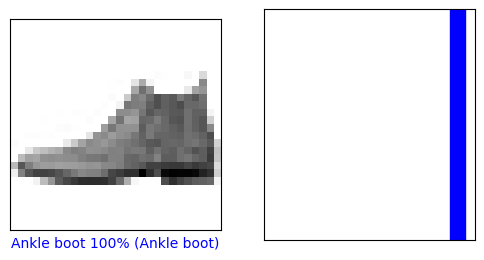

In [36]:
i =  0
plt.figure(figsize=(6,  3))

plt.subplot(1,  2,  1)
plot_image(i, predictions_dropout, test_labels, test_images)

plt.subplot(1,  2,  2)
plot_value_array(i, predictions_dropout, test_labels)

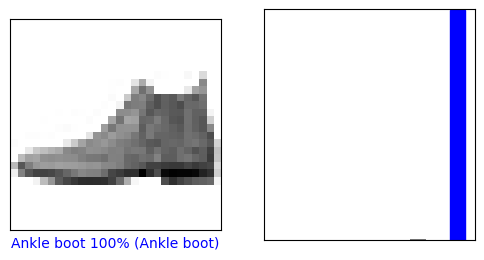

In [37]:
i =  0
plt.figure(figsize=(6,  3))

plt.subplot(1,  2,  1)
plot_image(i, predictions_dropout_batch, test_labels, test_images)

plt.subplot(1,  2,  2)
plot_value_array(i, predictions_dropout_batch, test_labels)

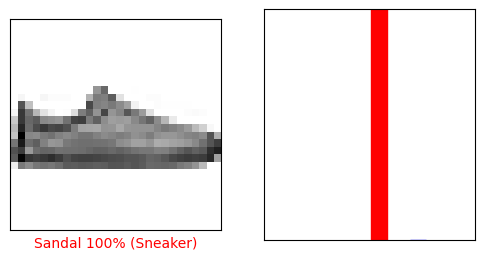

In [38]:
i = 12
plt.figure(figsize=(6, 3))

plt.subplot(1, 2, 1)
plot_image(i, predictions, test_labels, test_images)

plt.subplot(1, 2, 2)
plot_value_array(i, predictions,  test_labels)

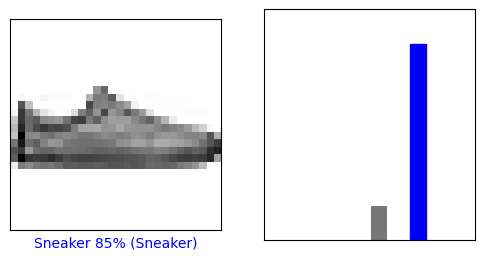

In [39]:
i = 12
plt.figure(figsize=(6, 3))

plt.subplot(1, 2, 1)
plot_image(i, predictions_dropout, test_labels, test_images)

plt.subplot(1, 2, 2)
plot_value_array(i, predictions_dropout,  test_labels)

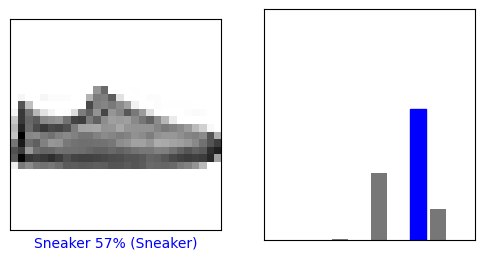

In [40]:
i = 12
plt.figure(figsize=(6, 3))

plt.subplot(1, 2, 1)
plot_image(i, predictions_dropout_batch, test_labels, test_images)

plt.subplot(1, 2, 2)
plot_value_array(i, predictions_dropout_batch,  test_labels)

No código a seguir, está sendo criado um gráfico para visualizar as previsões de um modelo de aprendizado de máquina em relação às imagens de teste. As variáveis **num_rows** e **num_cols** definem o número de linhas e colunas no layout do gráfico, enquanto **num_images** calcula o total de imagens a serem plotadas. Em seguida, é gerada uma figura usando a função **plt.figure** do matplotlib, com tamanho baseado no número de colunas e linhas desejadas. Um loop é utilizado para iterar sobre cada imagem e, para cada iteração, duas subplots são criadas: uma para exibir a imagem de teste e sua previsão, e outra para mostrar um array de valores que representam a confiança do modelo em cada classe. As funções **plot_image** e **plot_value_array** são chamadas para plotar as imagens e os arrays de valores, respectivamente.

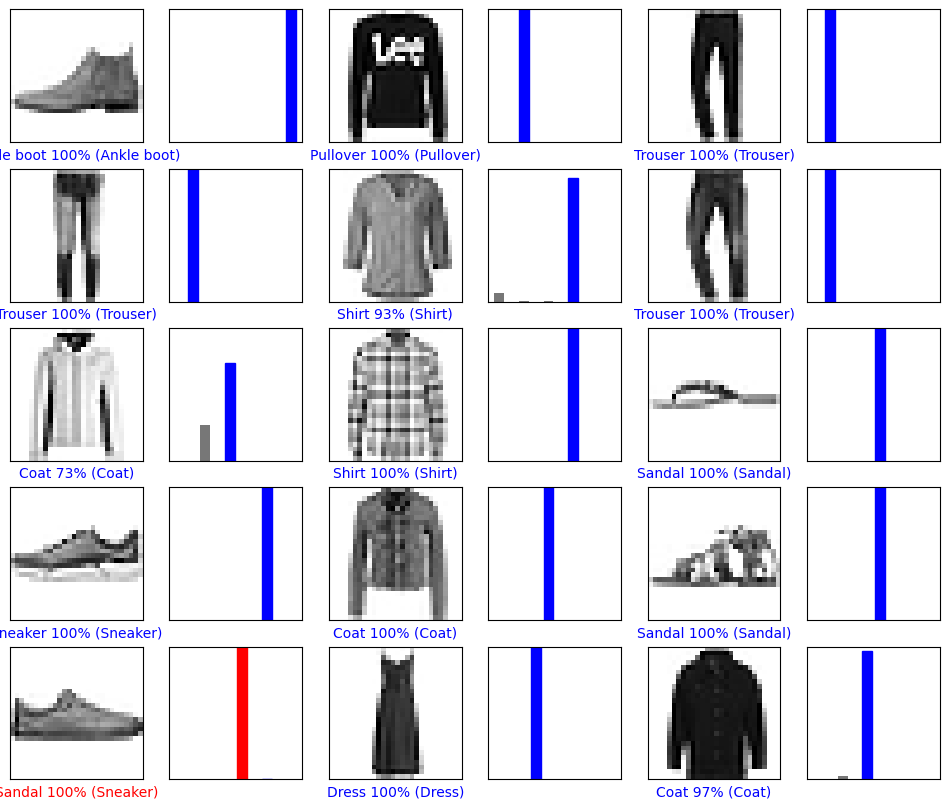

In [41]:
num_rows = 5
num_cols = 3
num_images = num_rows * num_cols
plt.figure(figsize=(2 * 2 * num_cols, 2 * num_rows))

for i in range(num_images):
    plt.subplot(num_rows, 2 * num_cols, 2 * i + 1)
    plot_image(i, predictions, test_labels, test_images)
  
    plt.subplot(num_rows, 2 * num_cols, 2 * i + 2)
    plot_value_array(i, predictions, test_labels)

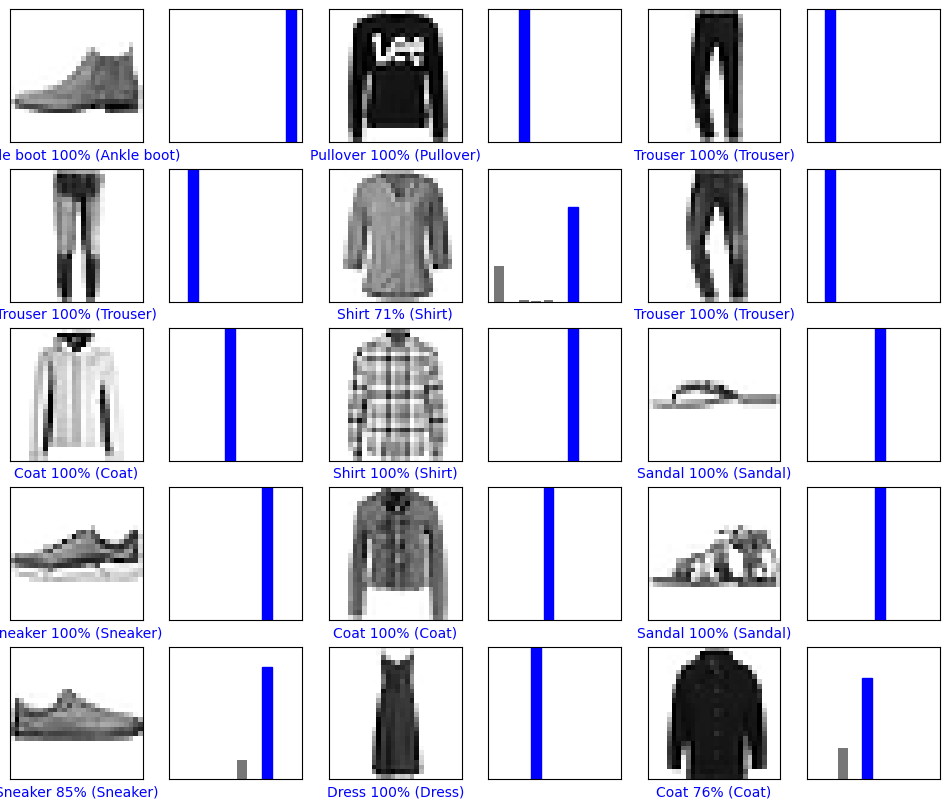

In [42]:
num_rows = 5
num_cols = 3
num_images = num_rows * num_cols
plt.figure(figsize=(2 * 2 * num_cols, 2 * num_rows))

for i in range(num_images):
    plt.subplot(num_rows, 2 * num_cols, 2 * i + 1)
    plot_image(i, predictions_dropout, test_labels, test_images)
  
    plt.subplot(num_rows, 2 * num_cols, 2 * i + 2)
    plot_value_array(i, predictions_dropout, test_labels)

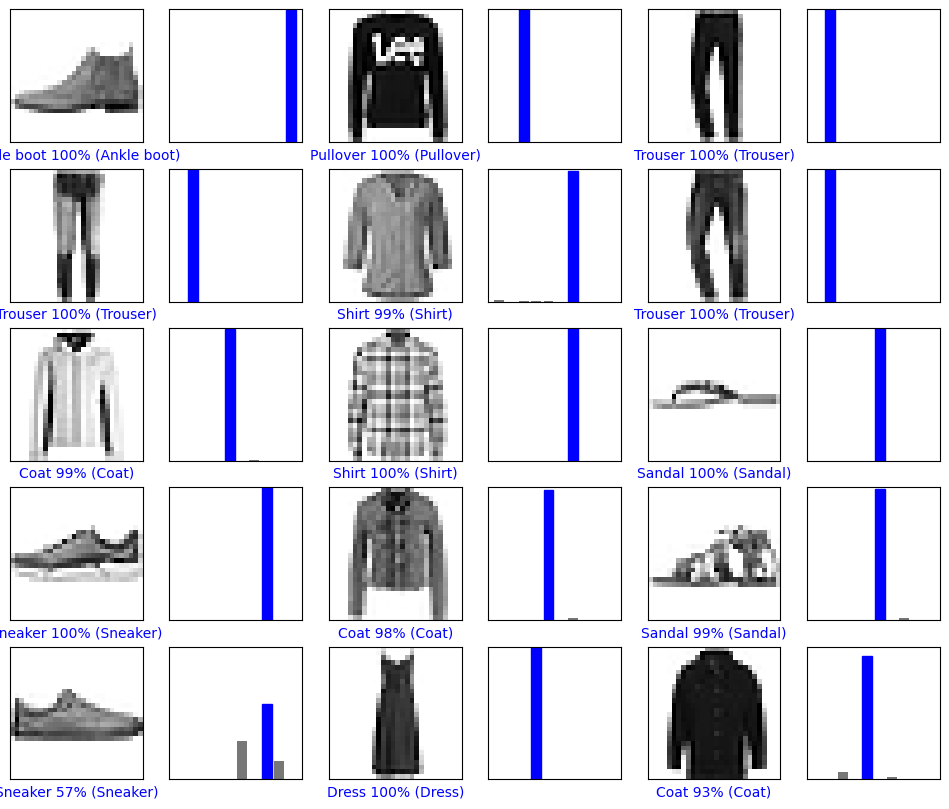

In [43]:
num_rows = 5
num_cols = 3
num_images = num_rows * num_cols
plt.figure(figsize=(2 * 2 * num_cols, 2 * num_rows))

for i in range(num_images):
    plt.subplot(num_rows, 2 * num_cols, 2 * i + 1)
    plot_image(i, predictions_dropout_batch, test_labels, test_images)
  
    plt.subplot(num_rows, 2 * num_cols, 2 * i + 2)
    plot_value_array(i, predictions_dropout_batch, test_labels)

### <font color=orange><strong>Verificando as características das imagens manipuladas durante aprendizado de máquina</strong></font>

No código a seguir, está sendo atribuída à variável **img** a primeira imagem do conjunto **test_images**, e em seguida, é impressa a forma da imagem utilizando a função **shape**. Esta função retorna as dimensões da imagem, indicando sua altura, largura e número de canais de cor, se aplicável. É uma operação comum em processamento de imagens para verificar as características das imagens manipuladas durante o desenvolvimento de algoritmos de visão computacional ou aprendizado de máquina.

In [44]:
img = test_images[0]
print(img.shape)

(28, 28, 1)


No código a seguir, está sendo adicionada uma imagem a um lote (batch) onde ela é o único membro. Isso é feito utilizando a **função** `expand_dims` da biblioteca **NumPy** para adicionar uma dimensão extra à imagem, transformando-a em um array unidimensional dentro de um array bidimensional. Em seguida, é impressa a forma (`shape`) do array resultante usando a **variável** `img.shape`, fornecendo informações sobre as dimensões da imagem no lote.

In [45]:
img = (np.expand_dims(img, 0))
print(img.shape)

(1, 28, 28, 1)


### <font color=orange><strong>Fazendo as previsões usando os modelos para classificar uma imagem</strong></font>

No código a seguir, está sendo feita uma previsão usando o modelo **model_fashion_mnist** para classificar uma única imagem representada pela variável **img**. A função **`predict`** é utilizada para fazer essa previsão e o resultado é armazenado na variável **predictions_single**. Em seguida, a previsão é impressa na tela usando a função **`print`**.

In [46]:
predictions_single = model_fashion_mnist.predict(img)
print('\nPrediction:\n', (predictions_single))

1/1 [==============================] - 0s 209ms/step

Prediction:
 [[1.8453948e-16 2.6666933e-14 7.8968981e-17 5.9413199e-18 1.3404231e-20
  1.8603732e-15 3.1239989e-16 2.2404358e-09 1.9417280e-22 1.0000000e+00]]


In [47]:
predictions_single_dropout = model_fashion_mnist_dropout.predict(img)
print('\nPrediction:\n', (predictions_single_dropout))

1/1 [==============================] - 0s 250ms/step

Prediction:
 [[1.9151293e-13 7.2147669e-18 2.9568417e-15 2.9448422e-15 6.1368990e-15
  6.9638578e-10 6.9212573e-14 4.0522441e-08 1.7735763e-15 1.0000000e+00]]


In [51]:
predictions_single_batch = model_fashion_mnist_dropout_batch_size.predict(img)
print('\nPrediction:\n', (predictions_single_batch))

1/1 [==============================] - 0s 204ms/step

Prediction:
 [[6.12628384e-08 5.35983276e-08 8.58592131e-09 2.65219796e-07
  2.34436754e-07 7.90459380e-05 4.58509390e-08 3.84651055e-03
  1.12144654e-07 9.96073723e-01]]


### <font color=orange><strong>Visualizando os resultados de modelos de aprendizado de máquina</strong></font>

No código a seguir, está sendo utilizado o método **plot_value_array** para plotar os valores de predição para uma única imagem, representada por **predictions_single**, em relação aos rótulos de teste (**test_labels**). Em seguida, são ajustados os rótulos do eixo x para corresponder aos nomes das classes, definidos em **class_names**, com uma rotação de 45 graus para melhor visualização. Esta sequência de comandos é comumente empregada em tarefas de visualização de resultados de modelos de aprendizado de máquina, onde é importante analisar a distribuição das predições em relação às classes disponíveis.

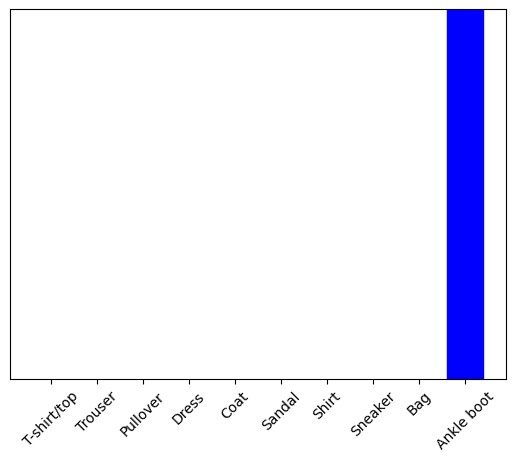

In [48]:
plot_value_array(0, predictions_single, test_labels)
_ = plt.xticks(range(10), class_names, rotation = 45)

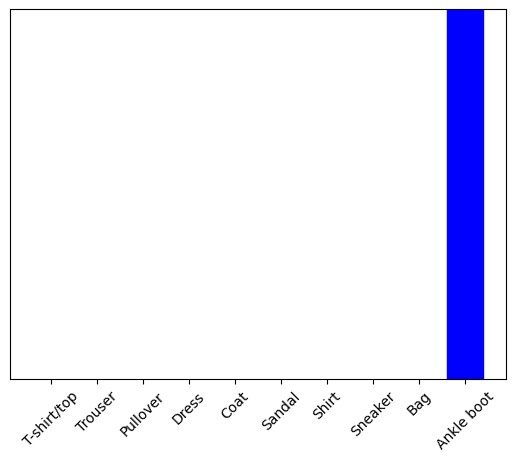

In [49]:
plot_value_array(0, predictions_single_dropout, test_labels)
_ = plt.xticks(range(10), class_names, rotation = 45)

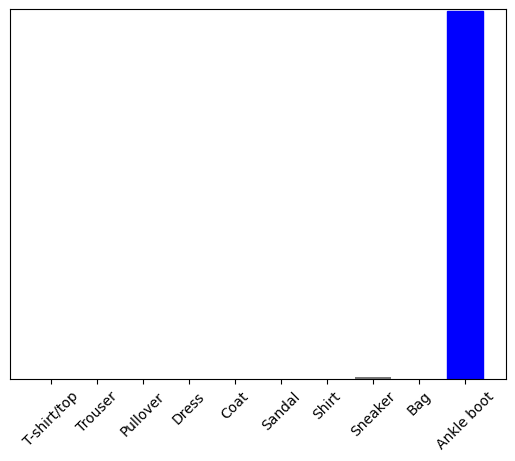

In [52]:
plot_value_array(0, predictions_single_batch, test_labels)
_ = plt.xticks(range(10), class_names, rotation = 45)

No código a seguir, está sendo utilizado a função **`argmax`** da biblioteca **np** para determinar o índice do maior valor presente no array **predictions_single**, especificamente no primeiro elemento, representando a classificação mais provável de uma predição de modelo. Essa função é comumente usada em tarefas de classificação para identificar a classe com a maior probabilidade de ocorrência.

In [53]:
np.argmax(predictions_single[0])

9